In [1]:
from processing.load_data import load_dataset, load_rain_data
from processing.plot import *
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager


plt.rc('font', size=10)  # controls default text sizes
plt.rc('axes', titlesize=25)  # fontsize of the axes title
plt.rc('axes', labelsize=25)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)  # fontsize of the tick labels
plt.rc('ytick', labelsize=25)  # fontsize of the tick labels
plt.rc('legend', fontsize=25)  # legend fontsize
# plt.rc('legend', fontsize=25)  # legend fontsize
plt.rc('figure', titlesize=40)  # fontsize of the figure title
#coding:utf-8
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['cmb10'] #用来正常显示中文标签
plt.rcParams['font.family'] = 'cmb10'#已替换为宋体
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

zhanqian = load_dataset(os.getcwd() + '/data/zhanqian.csv').multiply(100)
huizhou = load_dataset(os.getcwd() + '/data/zhonglou.csv').multiply(100)
ningguo = load_dataset(os.getcwd() + '/data/ningguo.csv').multiply(100)
xiyou = load_dataset(os.getcwd() + '/data/xiyou.csv').multiply(100)

In [2]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%h')

def weekday_weekend_ten_min_plot(df, ax, title):
    """
    Make a per 10 min average plot for traffic congestion and block %, for weekdays and weekends
    :param DataFrame df: Traffic DataFrame used to plot
    :param plt.axis ax: Matplotlib axis to plot on
    :param str title: Title for the plot
    """

    def process_average(df):
        """
        Calculate per 10 minute average for every date
        :param df: Traffic DataFrame used to calculate
        :return: DataFrame containing the calculate per 10 minute data
        """
        avg = df.groupby([df.index.hour, df.index.minute]).mean()
        avg.index = avg.index.map('{0[0]}:{0[1]}'.format)
        avg.index = pd.to_datetime(avg.index, format='%H:%M').time
        return avg

    weekday = df[df.index.dayofweek < 5]
    weekend = df[df.index.dayofweek >= 5]
    avg_weekday = process_average(weekday)[['congestion', 'heavy_congestion']].rename({'congestion': '工作日不畅率',
                                                                            'heavy_congestion': '工作日严重拥堵率'}, axis=1)
    avg_weekend = process_average(weekend)[['congestion', 'heavy_congestion']].rename({'congestion': '周末不畅率',
                                                                            'heavy_congestion': '周末严重拥堵率'}, axis=1)
    plot_df = pd.concat([avg_weekday, avg_weekend], axis=1)
    sns.lineplot(data=plot_df, ax=ax, size=[10,20,30,40])
    ax.set_xlim('00:00', '23:50')
    ax.set_ylim(0, 70)
    ax.set_xlabel('时间/h')
    ax.set_ylabel('百分比/%')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=40)
    ax.set_xticks([f'{hr}:00' for hr in range(0, 24, 2)]);
#     import matplotlib.dates as mdates
#     myFmt = mdates.DateFormatter('%h')
#     ax.xaxis.set_major_formatter(myFmt)
    ax.set_title(title)
    ax.legend(loc='upper left')
    ax.grid()

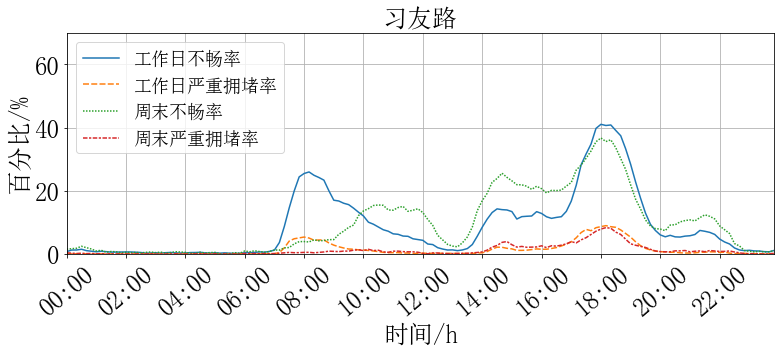

In [3]:
plt.rc('legend', fontsize=18)  # legend fontsize
fig = plt.figure(figsize=(11, 5))

# weekday_weekend_ten_min_plot(zhanqian, fig.gca(), '站前路')
# weekday_weekend_ten_min_plot(huizhou, fig.gca(), '徽州大道')
# weekday_weekend_ten_min_plot(ningguo, fig.gca(), '南一环')
weekday_weekend_ten_min_plot(xiyou, fig.gca(), '习友路')
plt.tight_layout()
fig.savefig('1_4.pdf')

In [4]:
def hourly_violinplot(df, ax, title):
    """
    Produce hourly violinplot, separting weekdays and weekends
    :param DataFrame df: Traffic DataFrame used to plot
    :param plt.axis ax: Matplotlib axis to plot on
    :param str title: Plot title
    """
    df_hr = process_hour_group(df)
    sns.violinplot(x='hour', y='congestion', hue='isweekday', data=df_hr, ax=ax, split=True)
    ax.set_ylim(0, 100)
    ax.set_xlabel('时间/h')
    ax.set_ylabel('不畅率/%')
    ax.set_title(title)
    # Set legend
    ax.legend(loc='upper left')
    leg = ax.get_legend()
#     leg.set_title('日期类型')
    for t, l in zip(leg.texts, ['周末', '工作日']): t.set_text(l)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

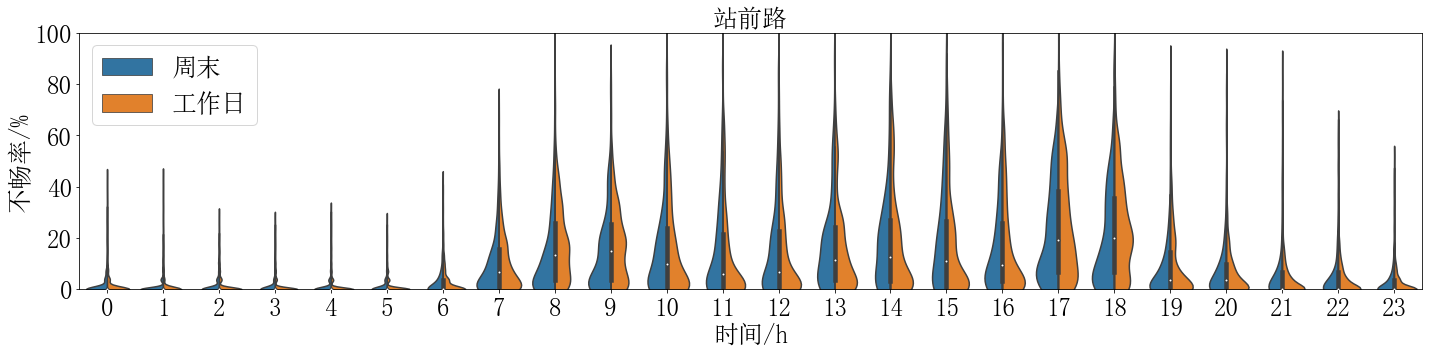

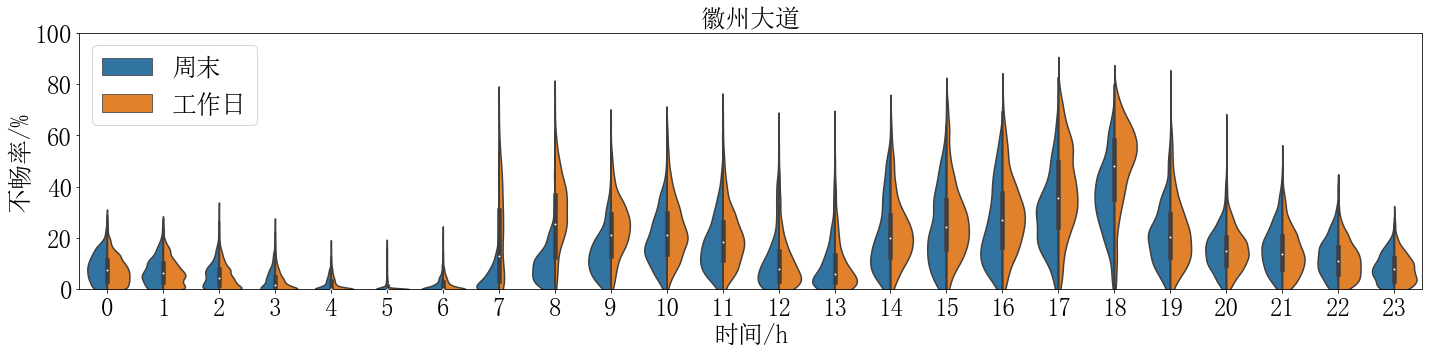

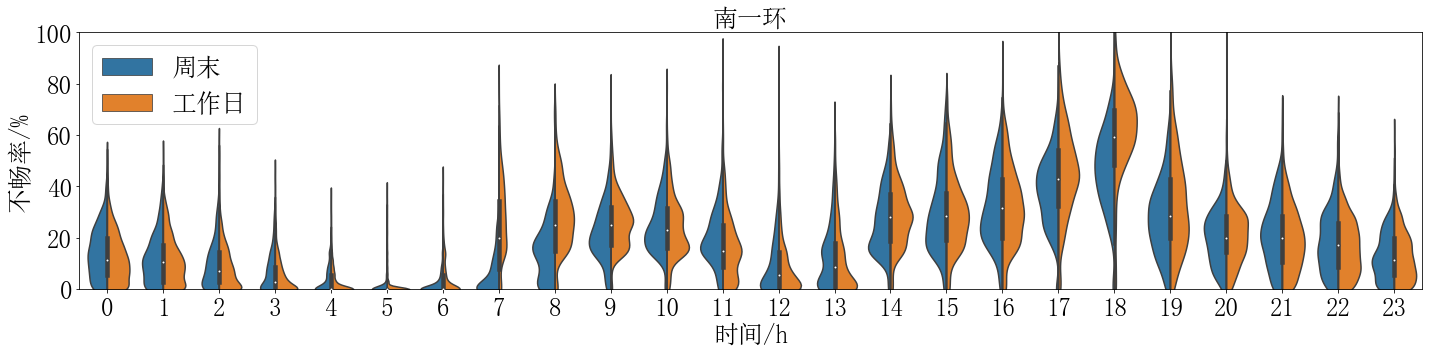

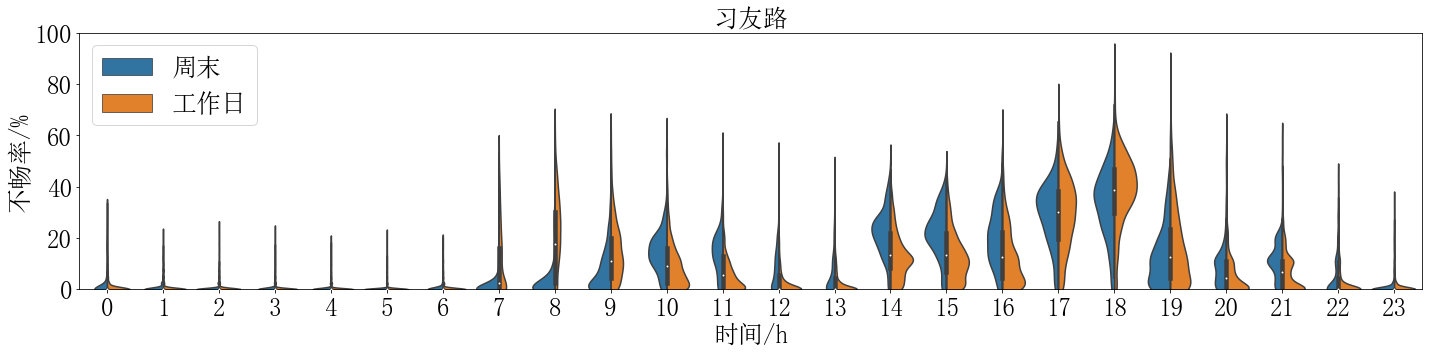

In [5]:
dd = {
    1: (zhanqian, '站前路'),
    2: (huizhou, '徽州大道'),
    3: (ningguo, '南一环'),
    4: (xiyou, '习友路')
}
plt.rc('legend', fontsize=25)  # legend fontsize
for index, road_data in dd.items():
    fig = plt.figure(figsize = (20,5))
    hourly_violinplot(road_data[0], fig.gca(), road_data[1])
    plt.tight_layout()
    fig.savefig(f'2_{index}.pdf')

# Connect Traffic with Weather
We obtained per hour rainfall amount (mm) data from Anhui Meteorological Bureau on stations near our 4 parts of the city. We will now try to find some relationship between the rain and traffic congestion.

The rainfall is measured in mm(millimeter) for every pass hour. We will classify them into 6:
- `0`: 0mm No rain
- `1`: 0.1-1mm Light Rain
- `2`: 1-5mm Heavy Rain
- `3`: 5-10mm Super Heavy Rain
- `4`: 10-20mm Flash Flood
- `5`: 20mm+ Super Flash Flood



In [6]:
zhanqian_rain = load_rain_data(os.getcwd() + '/data/rain_data.xlsx', 2)
huizhou_rain = load_rain_data(os.getcwd() + '/data/rain_data.xlsx', 3)
ningguo_rain = load_rain_data(os.getcwd() + '/data/rain_data.xlsx', 4)
xiyou_rain = load_rain_data(os.getcwd() + '/data/rain_data.xlsx', 5)

## Rainfall data overview
As we made a statistical count of the rainfall data, we find out there isn't that much recorded points of heavy rains in Hefei. Thus we might have trouble getting a solid conclusion on the cause of the rain.

In [7]:
rain_data_summary({'Zhanqian Rd': zhanqian_rain, 'Huizhou Ave': huizhou_rain,
                  'Ningguo Rd': ningguo_rain, 'Xiyou Rd': xiyou_rain})

Zhanqian Rd
0: 6870	1: 660	2: 164	3: 37	4: 12	5: 6	
Huizhou Ave
0: 6895	1: 582	2: 209	3: 30	4: 12	5: 7	
Ningguo Rd
0: 6189	1: 569	2: 145	3: 24	4: 11	5: 11	
Xiyou Rd
0: 7341	1: 244	2: 95	3: 18	4: 15	5: 5	


## Boxplot of impact to congestion by rain levels
As we see from the summary above, the incidence of heavy rain are relatively small to non rain, so we encountered difficulty to find a string correlation. There are many other reasons why there is a different amount of traffic for rainy days, including less people would like to go out during rainy days. All these different causes make it difficult to make a solid concludion.

However, some insights can still be inferred from the following plots. For rushing hours off work (5-7pm), it shows that the rain amount has a stronger relationship to traffic. A light and heavy rain generally makes more congestion. This could because that people already drive to work has to drive back, making them no choice on whether go out or not. They tend to drive slowly if the weather is bad, making more congestion.

In [8]:
def rain_level_boxplot(combined_data, ax, title):
    """
    Make a box plot comparing rain levels for every hour traffic congestion
    :param DataFrame combined_data: Processed DataFrame containing both traffic and rain data
    :param plt.axis ax: Matplotlib axis to plot on
    :param str title: Title for the plot
    """
    flatui = ["#196D9D", "#0E982D", "#D47518", "#D0322F", "#9270B4", "#77564C"]
    sns.boxplot(x='hour', y='congestion', hue='Rain Level', data=combined_data, ax=ax, palette=flatui)
    ax.set_title(title)
    ax.set_xlabel('时间/h')
    ax.set_ylabel('不畅率/%')
    ax.grid()
    leg = ax.get_legend()
    leg.set_title('')
    for t, l in zip(leg.texts, ['无降水', '0.1-1mm', '1-5mm', '5-10mm', '10-20mm', '20mm+']): t.set_text(l)

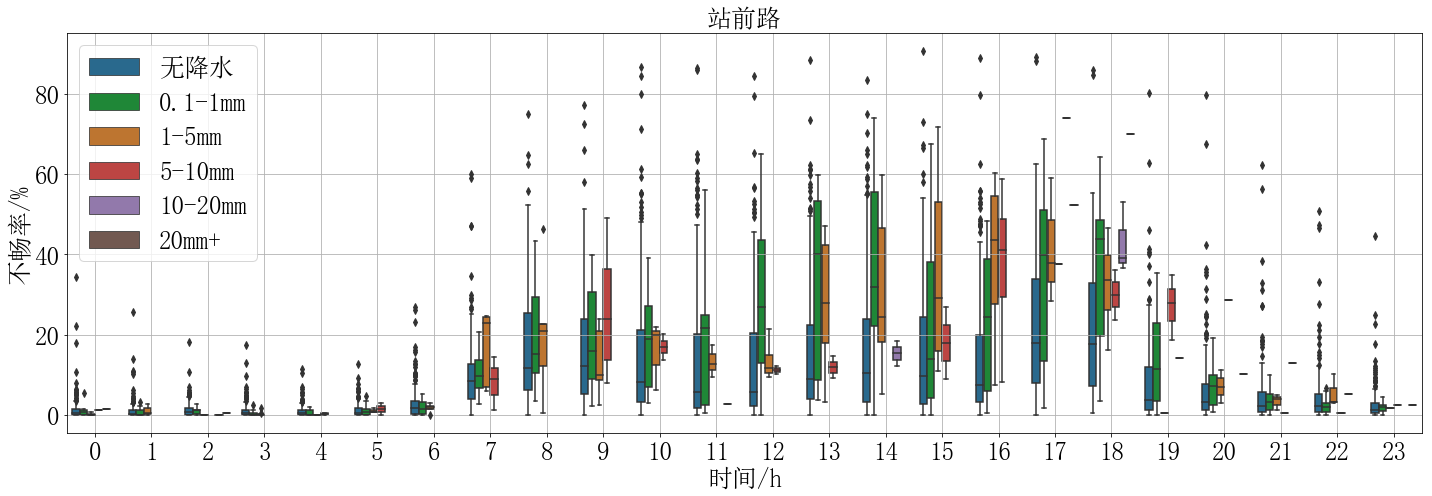

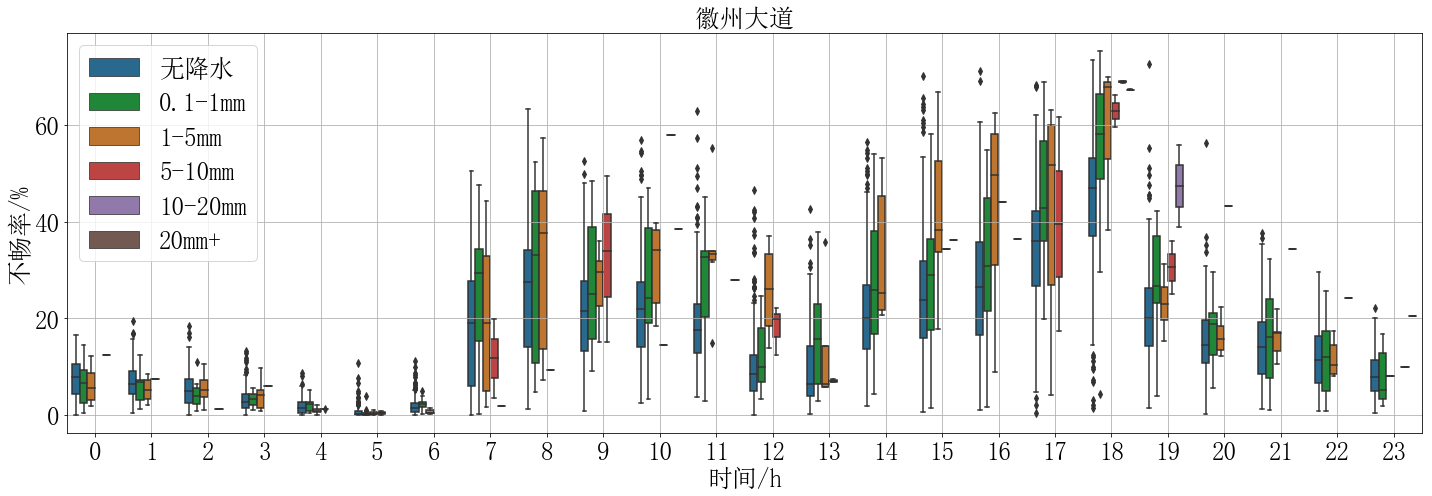

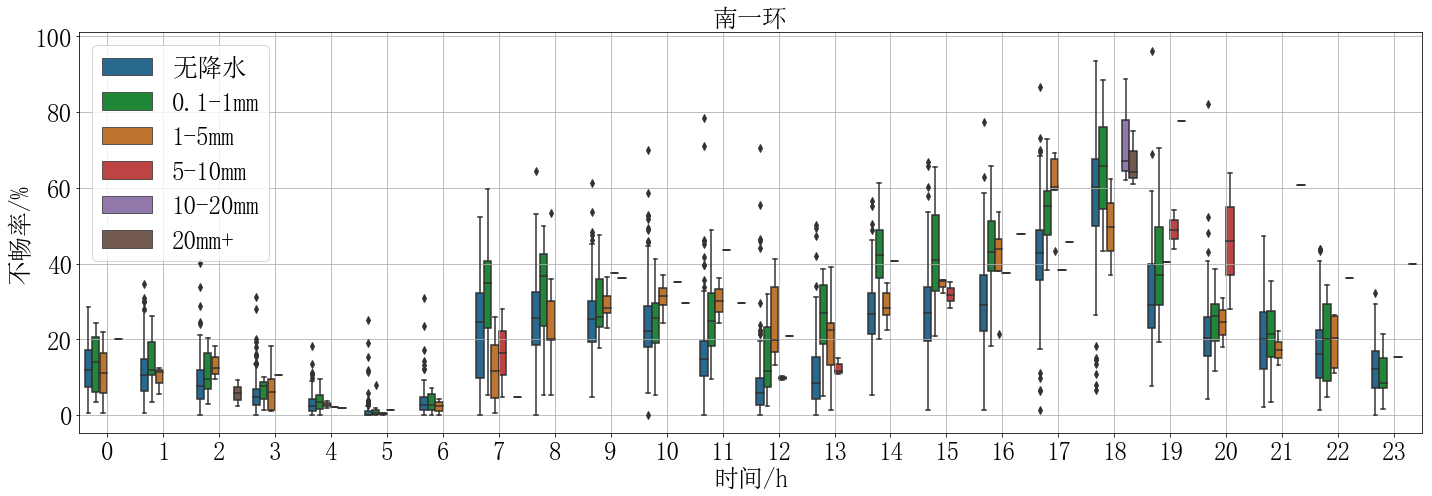

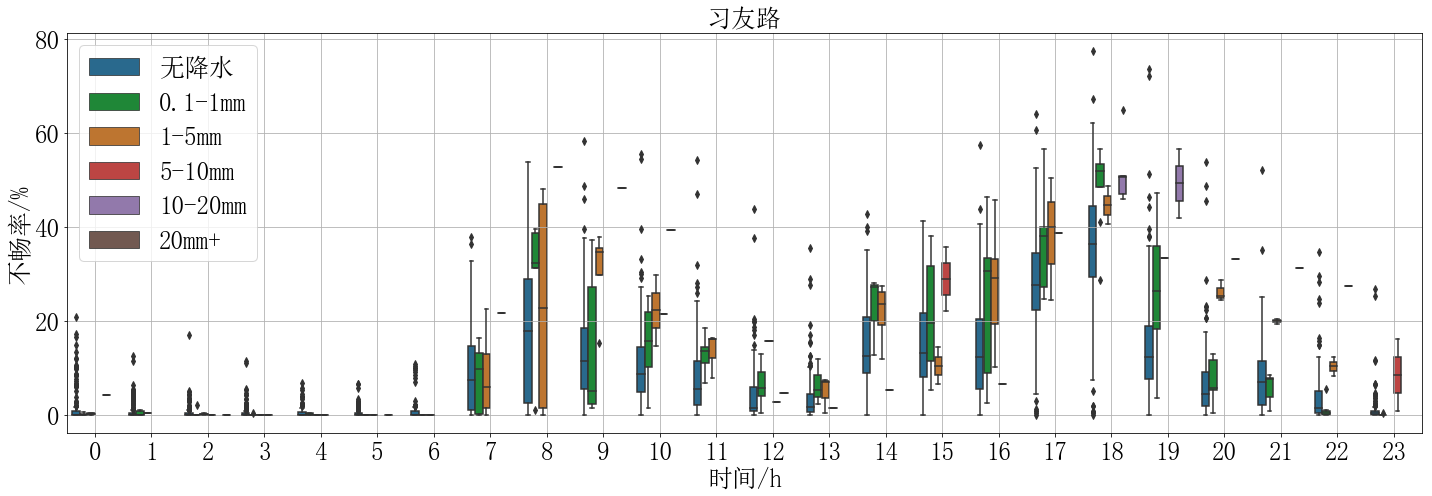

In [9]:
zhanqian_combined = process_rain_data(zhanqian, zhanqian_rain)
huizhou_combined = process_rain_data(huizhou, huizhou_rain)
ningguo_combined = process_rain_data(ningguo, ningguo_rain)
xiyou_combined = process_rain_data(xiyou, xiyou_rain)

dd = {
    1: (zhanqian_combined, '站前路'),
    2: (huizhou_combined, '徽州大道'),
    3: (ningguo_combined, '南一环'),
    4: (xiyou_combined, '习友路')
}
plt.rc('legend', fontsize=25)  # legend fontsize
for index, road_data in dd.items():
    fig = plt.figure(figsize=(20,7))
    rain_level_boxplot(road_data[0], fig.gca(), road_data[1])
    plt.tight_layout()
    fig.savefig(f'4_{index}.pdf')

In [10]:
def process_influence(data, cong_col='congestion'):
    data = data[data['rain'] > 0]
    hr_avg = process_hour_avg(data)[cong_col]
    hour_avg = hr_avg[data['hour']]
    hour_avg.index = data.index
    data['Current Hour Avg'] = hour_avg
    data['Traffic influence'] = data[cong_col] - hour_avg
    return data

cong_col = 'congestion2'
zhanqian_infl = process_influence(zhanqian_combined, cong_col)
huizhou_infl = process_influence(huizhou_combined, cong_col)
ningguo_infl = process_influence(ningguo_combined, cong_col)
xiyou_infl = process_influence(xiyou_combined, cong_col)

data = pd.concat( [zhanqian_infl, huizhou_infl, ningguo_infl, xiyou_infl], axis=0) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
data[data['rain'] == 17.7]
# data['Traffic influence'].sort_values()

exp       cong    block   unknown  congestion  \
date                                                                     
2018-07-28 18:00:00  37.9755  47.439333  14.5855  0.000333   62.025062   

                     congestion2  heavy_congestion  rain  Rain Level  hour  \
date                                                                         
2018-07-28 18:00:00     76.61061         14.585548  17.7           4    18   

                     Current Hour Avg  Traffic influence  
date                                                      
2018-07-28 18:00:00         87.104983         -10.494373

In [12]:
grey = [
        # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0, 'rgb(255, 255, 255)'], [0.1, 'rgb(255, 255, 255)'],
        [0.1, 'rgb(230, 230, 230)'], [0.2, 'rgb(230, 230, 230)'],
        [0.2, 'rgb(210, 210, 210)'], [0.3, 'rgb(210, 210, 210)'],
        [0.3, 'rgb(180, 180, 180)'], [0.4, 'rgb(180, 180, 180)'],
        [0.4, 'rgb(150, 150, 150)'], [0.5, 'rgb(150, 150, 150)'],
        [0.5, 'rgb(120, 120, 120)'], [0.6, 'rgb(120, 120, 120)'],
        [0.6, 'rgb(90, 90, 90)'], [0.7, 'rgb(90, 90, 90)'],
        [0.7, 'rgb(60, 60, 60)'], [0.8, 'rgb(60, 60, 60)'],
        [0.8, 'rgb(30, 30, 30)'], [0.9, 'rgb(30, 30, 30)'],
        [0.9, 'rgb(0, 0, 0)'], [1.0, 'rgb(0, 0, 0)']
]

# cs = 
# [
#         # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
#         [0, 'rgb(0, 0, 0)'], [0.1, 'rgb(0, 0, 0)'],
#         [0.1, 'rgb(20, 20, 20)'], [0.2, 'rgb(20, 20, 20)'],
#         [0.2, 'rgb(40, 40, 40)'], [0.3, 'rgb(40, 40, 40)'],
#         [0.3, 'rgb(60, 60, 60)'], [0.4, 'rgb(60, 60, 60)'],
#         [0.4, 'rgb(80, 80, 80)'], [0.5, 'rgb(80, 80, 80)'],
#         [0.5, 'rgb(100, 100, 100)'], [0.6, 'rgb(100, 100, 100)'],
#         [0.6, 'rgb(120, 120, 120)'], [0.7, 'rgb(120, 120, 120)'],
#         [0.7, 'rgb(140, 140, 140)'], [0.8, 'rgb(140, 140, 140)'],
#         [0.8, 'rgb(160, 160, 160)'], [0.9, 'rgb(160, 160, 160)'],
#         [0.9, 'rgb(180, 180, 180)'], [1.0, 'rgb(180, 180, 180)']
# ]

In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np

trace1 = go.Scatter(
    x = data["rain"],
    y = data["Current Hour Avg"],
    mode='markers',
    marker=dict(
#         size = data['Traffic influence'] * 30 + 21,
        size = (data['Traffic influence'] / 100 + 0.7) * 20,
        color = data['Traffic influence'] / 100, #set color equal to a variable
        colorscale='Jet',
#         colorscale=grey,
        showscale=True
    )
)

iplot([trace1], filename='scatter-plot-with-colorscale')

In [115]:
data['infl'] = data['Traffic influence'] / 100 + 1
data['infl_size'] = ((data['infl']) * 100)
data['infl_col'] = data['infl']

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np
import plotly.express as px

gapminder = px.data.gapminder()
#gapminder.columns
# fig = px.scatter_3d(gapminder, x='year', y='continent', z='pop', size='gdpPercap', color='lifeExp',
#                     hover_data=['country'])

fig = px.scatter_3d(data, x='rain', y='Current Hour Avg', z='infl',
                    size = 'infl_size',
                    color = 'infl_col',
                    color_continuous_scale = 'Jet',
                    width = 1000,
                    height = 1000,
                    opacity = 1,
#                     log_x = True,
                    hover_data=['Traffic influence'])
# fig.update_layout(scene_zaxis_type="log")

name = 'default'
# # Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1.3, y=-1.7, z=2)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()
plot(fig, filename = '5_v2.html', auto_open=False)
# fig.write_image("fig1.pdf")

'5_v2.html'

In [13]:
data['infl'] = data['Traffic influence'] / 100 + 1
data['infl_size'] = ((data['infl']) * 100)
data['infl_col'] = data['infl']

import plotly
import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
import numpy as np
import plotly.express as px

gapminder = px.data.gapminder()
#gapminder.columns
# fig = px.scatter_3d(gapminder, x='year', y='continent', z='pop', size='gdpPercap', color='lifeExp',
#                     hover_data=['country'])

fig = px.scatter_3d(data, x='rain', y='Current Hour Avg', z='infl',
                    size = 'infl_size',
                    color = 'infl_col',
                    color_continuous_scale = 'Jet',
                    width = 1000,
                    height = 1000,
                    opacity = 1,
#                     log_x = True,
                    hover_data=['Traffic influence'])
# fig.update_layout(scene_zaxis_type="log")

name = 'default'
# # Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1.3, y=-1.7, z=2)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()
# plot(fig, filename = '5_v2.html', auto_open=False)
# fig.write_image("fig1.pdf")

NameError: name 'plot' is not defined

In [15]:
zhanqian_rain_effect = process_rain(zhanqian, zhanqian_combined)
huizhou_rain_effect = process_rain(huizhou, huizhou_combined)
ningguo_rain_effect = process_rain(ningguo, ningguo_combined)
xiyou_rain_effect = process_rain(xiyou, xiyou_combined)

## Congestion difference from hourly average in different raining conditinon
As our further attempt to find more relationship between raining condition and traffic congestion, we calculated every sample's congestion difference to hourly average congestion, plotted the following scatter plot against how heavy it rains.

Since there are a lot of data spread out randonmly when raining between 0.1-1mm (light rain), we assumed such rain level doesn't affect traffic much, so we dropped those points from the plot. We are only plotting data when raining 1+ mm in the past hour. What we see from the plot is a general more congestion (difference is positive) for rain range around 5-20mm in the past hour. There are apparently more points at a higher positive difference in such rain range.

For rain less than 5mm in the past hour, the points are still distributed randomly, which doesn't give us more useful information.

For more heavy rains 20+ mm, although there are much less samples for us, we can see most of them are below the line (negative difference). This means it's actually less congested for flash flood hours. This could because people are unwilling to go out for such big rains, significantly decreased number of cars running on the road.

In [16]:
def cong_diff_scatter_plot(cong_diff_data, ax, title):
    """
    Produce the congestion difference in different raining condition scatter plot
    :param DataFrame cong_diff_data: DataFrame calculated by process_rain()
    :param plt.axis ax: Matplotlib axis to plot on
    :param str title: Title for the plot
    """
    from scipy.stats import linregress
    sns.scatterplot(x="rain", y="cong_diff", size="rain",hue="rain", data=cong_diff_data, ax=ax)
    slope, intercept, r_value, p_value, std_err = linregress(cong_diff_data["rain"],cong_diff_data["cong_diff"])
    print(f'{title}: Slope={slope}\tIntercept={intercept}\tR_Value={r_value}\tP_Value={p_value}\tStd_Err={std_err}')
    ax.axhline(y=0, color='black')
    ax.set_title(title)

In [17]:
def cong_diff_scatter_plot(cong_diff_data, ax, title):
    """
    Produce the congestion difference in different raining condition scatter plot
    :param DataFrame cong_diff_data: DataFrame calculated by process_rain()
    :param plt.axis ax: Matplotlib axis to plot on
    :param str title: Title for the plot
    """
    from scipy.stats import linregress
    sns.regplot(x="rain", y="cong_diff", data=cong_diff_data, ax=ax)
    slope, intercept, r_value, p_value, std_err = linregress(cong_diff_data["rain"],cong_diff_data["cong_diff"])
    y_avg = cong_diff_data["cong_diff"].mean()
    print(f'{title}: Slope={slope}\tIntercept={intercept}\tR_Value={r_value}\tP_Value={p_value}\tStd_Err={std_err}')
    ax.axhline(y=0, color='black')
    ax.set_title(title)
    ax.set_xlabel("雨强/(mm/h)")
    ax.set_ylabel("不畅率差/%")
    ax.text(0.6, 0.9, f'y = {slope:.3f}x + {intercept:.1f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=25)
    ax.text(0.6, 0.8, f'y_avg = {y_avg:.2f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=25)
    

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



站前路: Slope=0.09764919787131675	Intercept=6.413097239263681	R_Value=0.04791017767913911	P_Value=0.5423874397525614	Std_Err=0.15995005065064685


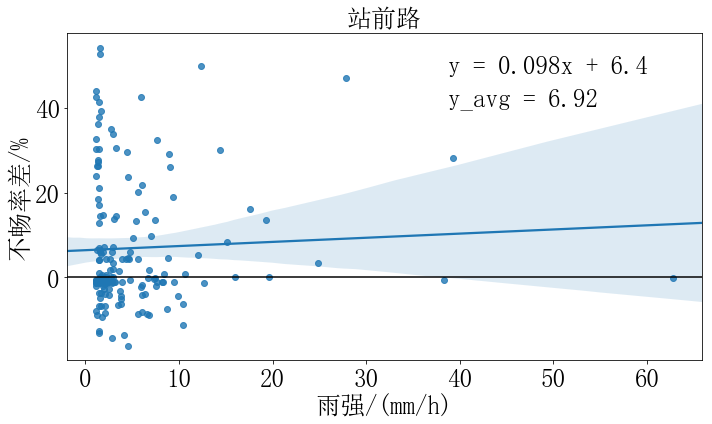

In [18]:
fig = plt.figure(figsize=(10,6)) 
cong_diff_scatter_plot(zhanqian_rain_effect, fig.gca(), '站前路')
# cong_diff_scatter_plot(huizhou_rain_effect, fig.gca(), '徽州大道')
# cong_diff_scatter_plot(ningguo_rain_effect, fig.gca(), '南一环')
# cong_diff_scatter_plot(xiyou_rain_effect, fig.gca(), '习友路')
plt.tight_layout()
plt.savefig('3_1.pdf')

# Future Steps
We made a lot of insightful plots that we can make a good amount of insights. Since the limited in time for this project, some of them are not discussed thoroghly. Some future plans in improving this analysis includes:
- Try other matiematical calculations to fit the rain better to traffic congestion
- Try other kind of plots for a better data / relation visualization
- Collect traffic information in a city with much more rain incidents
- Improve the data collection script so that the data is more consistent
...